In [ ]:
import gdown
import os
from glob import glob
import pandas as pd
from google.colab import drive
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.image as mpimg

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Pokemon csv 1.csv'
df1= pd.read_csv(file_path)
print(df1.head())

          Pokemon        Type             Species         Height  \
0       Abomasnow  Grass, Ice  Frost Tree Pokémon  2.2 m (7′03″)   
1  Mega Abomasnow  Grass, Ice  Frost Tree Pokémon  2.7 m (8′10″)   
2            Abra     Psychic         Psi Pokémon  0.9 m (2′11″)   
3           Absol        Dark    Disaster Pokémon  1.2 m (3′11″)   
4      Mega Absol        Dark    Disaster Pokémon  1.2 m (3′11″)   

                 Weight                                          Abilities  \
0  135.5 kg (298.7 lbs)       1. Snow Warning, Soundproof (hidden ability)   
1  185.0 kg (407.9 lbs)                                    1. Snow Warning   
2    19.5 kg (43.0 lbs)  1. Synchronize, 2. Inner Focus, Magic Guard (h...   
3   47.0 kg (103.6 lbs)  1. Pressure, 2. Super Luck, Justified (hidden ...   
4   49.0 kg (108.0 lbs)                                    1. Magic Bounce   

              EV Yield                          Catch Rate  \
0  1 Attack, 1 Sp. Atk    60 (7.8% with PokéBall, full HP)  

In [ ]:
file_path = '/content/drive/MyDrive/Pokemon csv 2.csv'
df2= pd.read_csv(file_path)
print(df2.head())

   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  


In [ ]:
# Rename the 'Names' and 'Pokemon' columns to 'Name' in both datasets
df1.rename(columns={'Pokemon': 'Pokemon Name'}, inplace=True)
df2.rename(columns={'Name': 'Pokemon Name'}, inplace=True)

# Print column names after renaming
print("Renamed columns in dataset 1:", df1.columns)
print("Renamed columns in dataset 2:", df2.columns)

# Save the corrected datasets (optional)
df1.to_csv('/content/drive/MyDrive/pokemonDB_dataset.csv', index=False)
df2.to_csv('/content/drive/MyDrive/Pokemon1.csv', index=False)

Renamed columns in dataset 1: Index(['Pokemon Name', 'Type', 'Species', 'Height', 'Weight', 'Abilities',
       'EV Yield', 'Catch Rate', 'Base Friendship', 'Base Exp', 'Growth Rate',
       'Egg Groups', 'Gender', 'Egg Cycles', 'HP Base', 'HP Min', 'HP Max',
       'Attack Base', 'Attack Min', 'Attack Max', 'Defense Base',
       'Defense Min', 'Defense Max', 'Special Attack Base',
       'Special Attack Min', 'Special Attack Max', 'Special Defense Base',
       'Special Defense Min', 'Special Defense Max', 'Speed Base', 'Speed Min',
       'Speed Max'],
      dtype='object')
Renamed columns in dataset 2: Index(['#', 'Pokemon Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


In [ ]:
# Merge datasets on 'Pokemon Name'
merged_df = df1.merge(df2, on="Pokemon Name", how="outer")

# Save the final dataset
merged_df.to_csv("/content/drive/MyDrive/merged_pokemon_data.csv", index=False)

print("✅ Merging complete! Final dataset saved as 'merged_pokemon_data.csv'.")

✅ Merging complete! Final dataset saved as 'merged_pokemon_data.csv'.


In [ ]:
# Load the cleaned dataset
merged_df = pd.read_csv("/content/drive/MyDrive/merged_pokemon_data.csv")

In [ ]:
# Print first 10 rows
print("🔹 First 10 rows of the merged dataset:")
print(merged_df.head(10))



🔹 First 10 rows of the merged dataset:
              Pokemon Name          Type              Species         Height  \
0                Abomasnow    Grass, Ice   Frost Tree Pokémon  2.2 m (7′03″)   
1  AbomasnowMega Abomasnow           NaN                  NaN            NaN   
2                     Abra       Psychic          Psi Pokémon  0.9 m (2′11″)   
3                    Absol          Dark     Disaster Pokémon  1.2 m (3′11″)   
4          AbsolMega Absol           NaN                  NaN            NaN   
5                 Accelgor           Bug    Shell Out Pokémon  0.8 m (2′07″)   
6    Aegislash Blade Forme  Steel, Ghost  Royal Sword Pokémon  1.7 m (5′07″)   
7   Aegislash Shield Forme  Steel, Ghost  Royal Sword Pokémon  1.7 m (5′07″)   
8     AegislashBlade Forme           NaN                  NaN            NaN   
9    AegislashShield Forme           NaN                  NaN            NaN   

                 Weight                                          Abilities  \
0 

In [ ]:
print("\n🔹 Dataset Info:")
print(merged_df.info())


🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Pokemon Name          1314 non-null   object 
 1   Type                  1215 non-null   object 
 2   Species               1215 non-null   object 
 3   Height                1215 non-null   object 
 4   Weight                1215 non-null   object 
 5   Abilities             1215 non-null   object 
 6   EV Yield              1215 non-null   object 
 7   Catch Rate            1215 non-null   object 
 8   Base Friendship       1215 non-null   object 
 9   Base Exp              1215 non-null   object 
 10  Growth Rate           1215 non-null   object 
 11  Egg Groups            1215 non-null   object 
 12  Gender                1215 non-null   object 
 13  Egg Cycles            1215 non-null   object 
 14  HP Base               1215 non-null   float64
 15  HP M

In [ ]:
# Define the base folder path where the subfolders are located
base_folder = "/content/drive/MyDrive/PokemonData"

# Loop through each subfolder (each representing a Pokémon)
for subfolder in os.listdir(base_folder):
    subfolder_path = os.path.join(base_folder, subfolder)

    # Check if it is a directory (subfolder)
    if os.path.isdir(subfolder_path):
        # Get all image files in the subfolder (e.g., .png, .jpg)
        image_files = [f for f in os.listdir(subfolder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

        # Rename each image in the subfolder to match the folder's name (Pokémon name)
        for i, img_name in enumerate(image_files):
            old_img_path = os.path.join(subfolder_path, img_name)

            # Construct the new image name (e.g., "pokemon_name_1.png")
            new_img_name = f"{subfolder}_{i+1}{os.path.splitext(img_name)[1]}"  # Ensure file extension is preserved
            new_img_path = os.path.join(subfolder_path, new_img_name)

            # Rename the image
            os.rename(old_img_path, new_img_path)
            print(f"Renamed {old_img_path} to {new_img_path}")

print("Renaming complete!")

Streaming output truncated to the last 5000 lines.
Renamed /content/drive/MyDrive/PokemonData/Sandshrew/Sandshrew_25.jpg to /content/drive/MyDrive/PokemonData/Sandshrew/Sandshrew_25.jpg
Renamed /content/drive/MyDrive/PokemonData/Sandshrew/Sandshrew_26.jpg to /content/drive/MyDrive/PokemonData/Sandshrew/Sandshrew_26.jpg
Renamed /content/drive/MyDrive/PokemonData/Sandshrew/Sandshrew_27.jpg to /content/drive/MyDrive/PokemonData/Sandshrew/Sandshrew_27.jpg
Renamed /content/drive/MyDrive/PokemonData/Sandshrew/Sandshrew_28.jpg to /content/drive/MyDrive/PokemonData/Sandshrew/Sandshrew_28.jpg
Renamed /content/drive/MyDrive/PokemonData/Sandshrew/Sandshrew_29.jpg to /content/drive/MyDrive/PokemonData/Sandshrew/Sandshrew_29.jpg
Renamed /content/drive/MyDrive/PokemonData/Sandshrew/Sandshrew_30.jpg to /content/drive/MyDrive/PokemonData/Sandshrew/Sandshrew_30.jpg
Renamed /content/drive/MyDrive/PokemonData/Sandshrew/Sandshrew_31.jpg to /content/drive/MyDrive/PokemonData/Sandshrew/Sandshrew_31.jpg
Rena

In [ ]:
from glob import glob
image_folder = "/content/drive/MyDrive/PokemonData/"

# Search for images in ALL subdirectories
image_files = glob(os.path.join(image_folder, "**", "*.png"), recursive=True) + \
              glob(os.path.join(image_folder, "**", "*.jpg"), recursive=True) + \
              glob(os.path.join(image_folder, "**", "*.jpeg"), recursive=True)

# Check how many images were found
print(f"🔹 Found {len(image_files)} images")
print(image_files[:10])  # Display first 10 image file paths

🔹 Found 6820 images
['/content/drive/MyDrive/PokemonData/Slowbro/Slowbro_17.png', '/content/drive/MyDrive/PokemonData/Slowbro/Slowbro_18.png', '/content/drive/MyDrive/PokemonData/Slowbro/Slowbro_19.png', '/content/drive/MyDrive/PokemonData/Slowbro/Slowbro_20.png', '/content/drive/MyDrive/PokemonData/Slowbro/Slowbro_21.png', '/content/drive/MyDrive/PokemonData/Slowbro/Slowbro_22.png', '/content/drive/MyDrive/PokemonData/Slowbro/Slowbro_26.png', '/content/drive/MyDrive/PokemonData/Slowbro/Slowbro_30.png', '/content/drive/MyDrive/PokemonData/Slowbro/Slowbro_33.png', '/content/drive/MyDrive/PokemonData/Slowbro/Slowbro_34.png']


In [ ]:
# Get a list of all image file paths
image_paths = []
for subfolder in os.listdir(image_folder):
    subfolder_path = os.path.join(image_folder, subfolder)
    if os.path.isdir(subfolder_path):  # Ensure it's a directory
        for img_file in os.listdir(subfolder_path):
            if img_file.endswith(('png', 'jpg', 'jpeg')):  # Check for image extensions
                image_paths.append(os.path.join(subfolder_path, img_file))

# Select the first 5 images
top_5_images = image_paths[:5]



In [ ]:


    # List all subfolders (Pokémon names)
    subfolders = os.listdir(image_folder)
    print(f"Total Pokémon categories: {len(subfolders)}")
    print("Example categories:", subfolders[:5])  # Show first 5 Pokémon names

    # Check for images inside the folders
    image_paths = []
    for subfolder in subfolders:
        subfolder_path = os.path.join(image_folder, subfolder)
        if os.path.isdir(subfolder_path):  # Ensure it's a directory
            files = os.listdir(subfolder_path)
            image_files = [f for f in files if f.lower().endswith(('png', 'jpg', 'jpeg'))]

            if image_files:
                print(f"'{subfolder}' contains {len(image_files)} images. Example: {image_files[:3]}")
                # Store the first image path
                image_paths.append(os.path.join(subfolder_path, image_files[0]))
            else:
                print(f"Warning: '{subfolder}' contains NO images.")

    print(f"\nTotal images found: {len(image_paths)}")


Total Pokémon categories: 150
Example categories: ['Zapdos', 'Weepinbell', 'Voltorb', 'Wigglytuff', 'Wartortle']
'Zapdos' contains 51 images. Example: ['Zapdos_1.jpg', 'Zapdos_2.jpg', 'Zapdos_3.jpg']
'Weepinbell' contains 43 images. Example: ['Weepinbell_1.jpg', 'Weepinbell_2.jpg', 'Weepinbell_3.jpg']
'Voltorb' contains 55 images. Example: ['Voltorb_1.jpg', 'Voltorb_2.jpg', 'Voltorb_3.jpg']
'Wigglytuff' contains 56 images. Example: ['Wigglytuff_1.jpg', 'Wigglytuff_2.jpg', 'Wigglytuff_3.jpg']
'Wartortle' contains 48 images. Example: ['Wartortle_1.jpg', 'Wartortle_2.jpg', 'Wartortle_3.jpg']
'Weedle' contains 49 images. Example: ['Weedle_1.jpg', 'Weedle_2.jpg', 'Weedle_3.jpg']
'Vulpix' contains 50 images. Example: ['Vulpix_1.jpg', 'Vulpix_2.jpg', 'Vulpix_3.jpg']
'Zubat' contains 40 images. Example: ['Zubat_1.jpg', 'Zubat_2.jpg', 'Zubat_3.jpg']
'Weezing' contains 50 images. Example: ['Weezing_1.jpg', 'Weezing_2.jpg', 'Weezing_3.jpg']
'Vileplume' contains 56 images. Example: ['Vileplume_1.j

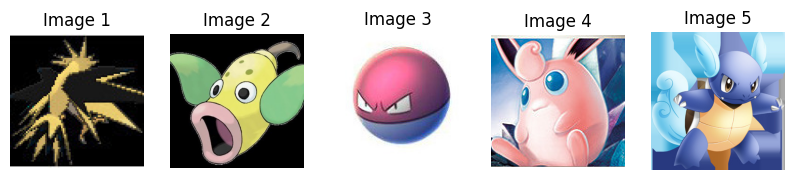

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Ensure at least 5 images exist
top_5_images = image_paths[:5] if len(image_paths) >= 5 else image_paths

if top_5_images:
    plt.figure(figsize=(10, 5))

    for i, img_path in enumerate(top_5_images):
        img = Image.open(img_path)  # Open image
        plt.subplot(1, 5, i + 1)  # Create subplot (1 row, 5 columns)
        plt.imshow(img)  # Show image
        plt.axis('off')  # Hide axes
        plt.title(f"Image {i+1}")  # Add title

    plt.show()  # Display all images
else:
    print("No images found to display.")


In [ ]:
print(image_paths[:5])

['/content/drive/MyDrive/PokemonData/Zapdos/Zapdos_1.jpg', '/content/drive/MyDrive/PokemonData/Weepinbell/Weepinbell_1.jpg', '/content/drive/MyDrive/PokemonData/Voltorb/Voltorb_1.jpg', '/content/drive/MyDrive/PokemonData/Wigglytuff/Wigglytuff_1.jpg', '/content/drive/MyDrive/PokemonData/Wartortle/Wartortle_1.jpg']


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

# Define image size (224x224 for ResNet/Vit, or 128x128 for CNN)
IMG_SIZE = (224, 224)

# Folder path
image_folder = '/content/drive/MyDrive/PokemonData'

# Image Preprocessing
def preprocess_image(img_path):
    # Load image
    img = load_img(img_path, target_size=IMG_SIZE)

    # Convert to array
    img_array = img_to_array(img)

    # Normalize pixel values (0-1)
    img_array = img_array / 255.0

    return img_array

# Define ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Ensures dataset is split for training and validation
)

# Define dataset path
dataset_path = '/content/drive/MyDrive/PokemonData'


In [ ]:
# Load training dataset
train_dataset = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Training subset
)

# Load validation dataset
val_dataset = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Validation subset
)

Found 5511 images belonging to 150 classes.
Found 1309 images belonging to 150 classes.


In [ ]:
# Load images and apply preprocessing
image_paths = []
labels = []
label_map = {}  # Mapping Pokémon names to labels

pokemon_folders = sorted(os.listdir(image_folder))  # Sort for consistency
for idx, folder in enumerate(pokemon_folders):
    folder_path = os.path.join(image_folder, folder)
    if os.path.isdir(folder_path):
        label_map[folder] = idx  # Assign numerical label
        for file in os.listdir(folder_path):
            if file.lower().endswith(('png', 'jpg', 'jpeg')):
                image_paths.append(os.path.join(folder_path, file))
                labels.append(idx)  # Store corresponding label



In [ ]:
import glob
import os
import numpy as np
from concurrent.futures import ThreadPoolExecutor
from PIL import Image

# Define your image folder path
dataset_directory = '/content/drive/MyDrive/PokemonData'

# Check if the directory exists and list files in it
if os.path.exists(dataset_directory):
    print(f"Directory found: {dataset_directory}")
    files = os.listdir(dataset_directory)
    print("Files in directory:", files)
else:
    print(f"Directory does not exist: {dataset_directory}")


Directory found: /content/drive/MyDrive/PokemonData
Files in directory: ['Zapdos', 'Weepinbell', 'Voltorb', 'Wigglytuff', 'Wartortle', 'Weedle', 'Vulpix', 'Zubat', 'Weezing', 'Vileplume', 'Victreebel', 'Tentacruel', 'Venomoth', 'Venusaur', 'Vaporeon', 'Staryu', 'Tauros', 'Tentacool', 'Tangela', 'Venonat', 'Seadra', 'Shellder', 'Seaking', 'Starmie', 'Seel', 'Slowpoke', 'Slowbro', 'Snorlax', 'Spearow', 'Squirtle', 'Rhydon', 'Raticate', 'Rattata', 'Raichu', 'Scyther', 'Rapidash', 'Sandshrew', 'Rhyhorn', 'Psyduck', 'Sandslash', 'Pidgeotto', 'Poliwag', 'Poliwrath', 'Pidgey', 'Porygon', 'Poliwhirl', 'Primeape', 'Pinsir', 'Ponyta', 'Pikachu', 'Onix', 'Persian', 'Ninetales', 'Paras', 'Omanyte', 'Nidorino', 'Oddish', 'Pidgeot', 'Omastar', 'Parasect', 'Meowth', 'Nidorina', 'Nidoqueen', 'Metapod', 'Moltres', 'Mewtwo', 'Mew', 'MrMime', 'Muk', 'Nidoking', 'Marowak', 'Machamp', 'Magikarp', 'Magneton', 'Magnemite', 'Magmar', 'Machop', 'Lickitung', 'Machoke', 'Mankey', 'Kingler', 'Kabuto', 'Lapras', '

In [ ]:
import os
print(os.listdir(dataset_path))  # This will list all files in the directory



['Zapdos', 'Weepinbell', 'Voltorb', 'Wigglytuff', 'Wartortle', 'Weedle', 'Vulpix', 'Zubat', 'Weezing', 'Vileplume', 'Victreebel', 'Tentacruel', 'Venomoth', 'Venusaur', 'Vaporeon', 'Staryu', 'Tauros', 'Tentacool', 'Tangela', 'Venonat', 'Seadra', 'Shellder', 'Seaking', 'Starmie', 'Seel', 'Slowpoke', 'Slowbro', 'Snorlax', 'Spearow', 'Squirtle', 'Rhydon', 'Raticate', 'Rattata', 'Raichu', 'Scyther', 'Rapidash', 'Sandshrew', 'Rhyhorn', 'Psyduck', 'Sandslash', 'Pidgeotto', 'Poliwag', 'Poliwrath', 'Pidgey', 'Porygon', 'Poliwhirl', 'Primeape', 'Pinsir', 'Ponyta', 'Pikachu', 'Onix', 'Persian', 'Ninetales', 'Paras', 'Omanyte', 'Nidorino', 'Oddish', 'Pidgeot', 'Omastar', 'Parasect', 'Meowth', 'Nidorina', 'Nidoqueen', 'Metapod', 'Moltres', 'Mewtwo', 'Mew', 'MrMime', 'Muk', 'Nidoking', 'Marowak', 'Machamp', 'Magikarp', 'Magneton', 'Magnemite', 'Magmar', 'Machop', 'Lickitung', 'Machoke', 'Mankey', 'Kingler', 'Kabuto', 'Lapras', 'Krabby', 'Jynx', 'Kangaskhan', 'Kadabra', 'Koffing', 'Kakuna', 'Kabutops

In [ ]:
print("Number of images:", len(image_paths))


Number of images: 0


In [ ]:
import numpy as np
# Convert images to NumPy array
image_data = np.array([preprocess_image(img_path) for img_path in image_paths])
labels = np.array(labels)

# Reshape to match TensorFlow format (Batch, Height, Width, Channels)
image_data = image_data.reshape(-1, IMG_SIZE[0], IMG_SIZE[1], 3)

# Apply data augmentation
augmented_data = datagen.flow(image_data, labels, batch_size=32)

print("Preprocessing Complete! Total images:", image_data.shape[0])
print("Unique Pokémon Classes:", len(label_map))

NameError: name 'image_paths' is not defined

In [ ]:
import numpy as np

# Save image data and labels to disk
np.save("image_data.npy", image_data)
np.save("labels.npy", labels)

print("Preprocessed data saved!")


In [ ]:
# Load preprocessed data
image_data = np.load("image_data.npy")
labels = np.load("labels.npy")

print("Preprocessed data loaded successfully!")
print("Total images:", image_data.shape[0])

In [ ]:
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt

# Path to your dataset
dataset_path = pathlib.Path("/content/drive/MyDrive/PokemonData")

# Create a dataset
batch_size = 32
img_height = 224
img_width = 224

dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True
)

# Normalize images (scale pixel values between 0 and 1)
normalization_layer = tf.keras.layers.Rescaling(1./255)
dataset = dataset.map(lambda x, y: (normalization_layer(x), y))

# Check dataset batches
for images, labels in dataset.take(1):  # Take 1 batch
    print(f"Batch Shape: {images.shape}")
    plt.figure(figsize=(10,10))
    for i in range(9):  # Show first 9 images
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy())
        plt.axis("off")
    plt.show()


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
dataset = dataset.map(lambda x, y: (normalization_layer(x), y))


In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])
dataset = dataset.map(lambda x, y: (data_augmentation(x, training=True), y))


In [ ]:
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_ds = dataset.take(train_size)
val_ds = dataset.skip(train_size).take(val_size)
test_ds = dataset.skip(train_size + val_size)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Initialize CNN Model
model = models.Sequential([
    # Convolutional layer + MaxPooling layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten the result and apply Fully Connected layer
    layers.Flatten(),
    layers.Dense(512, activation='relu'),

    # Output layer for classification
    layers.Dense(150, activation='softmax')  # 150 classes for Pokémon
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summarize the model architecture
model.summary()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping setup
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,  # Wait for 3 epochs of no improvement before stopping
    restore_best_weights=True  # Restore the model with the best weights
)

In [ ]:

history = model.fit(
    train_dataset,  # Training dataset
    epochs=10,  # Number of epochs
    validation_data=val_dataset,  # Validation dataset
    callbacks=[early_stopping]  # Add the early stopping callback
)
